In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
data = pd.read_csv('heart.csv')


In [2]:
shape = data.shape
print("Shape of Data:", shape)


Shape of Data: (303, 15)


In [3]:
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)


Missing Values:
Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64


In [4]:

data_types = data.dtypes
print("Data Types:")
print(data_types)

Data Types:
Unnamed: 0      int64
Age             int64
Sex             int64
ChestPain      object
RestBP          int64
Chol            int64
Fbs             int64
RestECG         int64
MaxHR           int64
ExAng           int64
Oldpeak       float64
Slope           int64
Ca            float64
Thal           object
AHD            object
dtype: object


In [5]:

zero_counts=(data ==0).sum()
print("Zero Counts:")
print(zero_counts)


Zero Counts:
Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            176
Thal            0
AHD             0
dtype: int64


In [6]:
zero_counts=(data ==0).sum().sum()
print("Zero Counts:")
print(zero_counts)

Zero Counts:
985


In [7]:

mean_age= data['Age'].mean()
print("Mean Age of Patients:", mean_age)

Mean Age of Patients: 54.43894389438944


In [8]:

selected_columns = ['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol']
selected_data = data[selected_columns]
train_data, test_data = train_test_split(selected_data, test_size=0.25, random_state=42)
selected_data

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204
...,...,...,...,...,...
298,45,1,typical,110,264
299,68,1,asymptomatic,144,193
300,57,1,asymptomatic,130,131
301,57,0,nontypical,130,236


In [9]:

train_data.shape

(227, 5)

In [10]:

test_data.shape

(76, 5)

In [11]:

actual_labels = [1] * 50 + [0] * (500 - 50)
predicted_labels = [1] * 45 + [0] * (500 - 45)
conf_matrix = confusion_matrix(actual_labels, predicted_labels)
TN, FP, FN, TP = conf_matrix.ravel()
accuracy = accuracy_score(actual_labels, predicted_labels)
precision = precision_score(actual_labels, predicted_labels)
recall = recall_score(actual_labels, predicted_labels)
f1 = f1_score(actual_labels, predicted_labels)
print("Confusion Matrix:",conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Confusion Matrix:
[[450   0]
 [  5  45]]

Accuracy: 0.99
Precision: 1.0
Recall: 0.9
F1 Score: 0.9473684210526316


In [12]:

print(data)

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0             1   63    1       typical     145   233    1        2    150   
1             2   67    1  asymptomatic     160   286    0        2    108   
2             3   67    1  asymptomatic     120   229    0        2    129   
3             4   37    1    nonanginal     130   250    0        0    187   
4             5   41    0    nontypical     130   204    0        2    172   
..          ...  ...  ...           ...     ...   ...  ...      ...    ...   
298         299   45    1       typical     110   264    0        0    132   
299         300   68    1  asymptomatic     144   193    1        0    141   
300         301   57    1  asymptomatic     130   131    0        0    115   
301         302   57    0    nontypical     130   236    0        2    174   
302         303   38    1    nonanginal     138   175    0        0    173   

     ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0        0  

In [13]:

X = data.drop(columns=["Unnamed: 0", "AHD"])


In [14]:

print(X)

     Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0     63    1       typical     145   233    1        2    150      0   
1     67    1  asymptomatic     160   286    0        2    108      1   
2     67    1  asymptomatic     120   229    0        2    129      1   
3     37    1    nonanginal     130   250    0        0    187      0   
4     41    0    nontypical     130   204    0        2    172      0   
..   ...  ...           ...     ...   ...  ...      ...    ...    ...   
298   45    1       typical     110   264    0        0    132      0   
299   68    1  asymptomatic     144   193    1        0    141      0   
300   57    1  asymptomatic     130   131    0        0    115      1   
301   57    0    nontypical     130   236    0        2    174      0   
302   38    1    nonanginal     138   175    0        0    173      0   

     Oldpeak  Slope   Ca        Thal  
0        2.3      3  0.0       fixed  
1        1.5      2  3.0      normal  
2     

In [15]:

Y = data['AHD']
print(Y)

0       No
1      Yes
2      Yes
3       No
4       No
      ... 
298    Yes
299    Yes
300    Yes
301    Yes
302     No
Name: AHD, Length: 303, dtype: object


In [16]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [17]:

X_train

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
287,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable
282,55,0,asymptomatic,128,205,0,1,130,1,2.0,2,1.0,reversable
197,45,0,asymptomatic,138,236,0,2,152,1,0.2,2,0.0,normal
158,60,1,asymptomatic,140,293,0,2,170,0,1.2,2,2.0,reversable
164,48,1,nonanginal,124,255,1,0,175,0,0.0,1,2.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,54,1,nontypical,192,283,0,2,195,0,0.0,1,1.0,reversable
71,67,1,asymptomatic,125,254,1,0,163,0,0.2,2,2.0,reversable
106,59,1,asymptomatic,140,177,0,0,162,1,0.0,1,1.0,reversable
270,61,1,asymptomatic,140,207,0,2,138,1,1.9,1,1.0,reversable


In [18]:
X_test

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
179,53,1,nonanginal,130,246,1,2,173,0,0.0,1,3.0,normal
228,54,1,asymptomatic,110,206,0,2,108,1,0.0,2,1.0,normal
111,56,1,asymptomatic,125,249,1,2,144,1,1.2,2,1.0,normal
246,58,1,asymptomatic,100,234,0,0,156,0,0.1,1,1.0,reversable
60,51,0,asymptomatic,130,305,0,0,142,1,1.2,2,0.0,reversable
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,58,1,nontypical,120,284,0,2,160,0,1.8,2,0.0,normal
258,70,1,nontypical,156,245,0,2,143,0,0.0,1,0.0,normal
56,50,1,nonanginal,140,233,0,0,163,0,0.6,2,1.0,reversable
242,49,0,asymptomatic,130,269,0,0,163,0,0.0,1,0.0,normal


In [19]:

Y_train

287     No
282    Yes
197     No
158    Yes
164     No
      ... 
188    Yes
71     Yes
106    Yes
270    Yes
102     No
Name: AHD, Length: 227, dtype: object

In [20]:

Y_test

179     No
228    Yes
111    Yes
246    Yes
60     Yes
      ... 
22     Yes
258     No
56     Yes
242     No
114    Yes
Name: AHD, Length: 76, dtype: object

In [21]:
k_e=[]
for k in data['AHD']:
    if k=='Yes':
        k_e.append(1)
    else:
        k_e.append(0)

        
da=pd.DataFrame()
da=pd.DataFrame(k_e,columns=['AHD'])
data['AHD']=da
data.corr()

C:\Users\adity\AppData\Local\Temp\ipykernel_13672\496329279.py:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,AHD
Unnamed: 0,1.000000,-0.002367,-0.070849,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,-0.028458,0.046938,0.048765
Age,-0.002367,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.362605,0.223120
Sex,-0.070849,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.093185,0.276816
RestBP,-0.022028,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098773,0.150825
Chol,-0.095518,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.119000,0.085164
Fbs,-0.039471,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.145478,0.025264
RestECG,-0.150232,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.128343,0.169202
MaxHR,-0.105488,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.264246,-0.417167
ExAng,-0.000402,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.145570,0.431894
Oldpeak,-0.120384,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.295832,0.424510


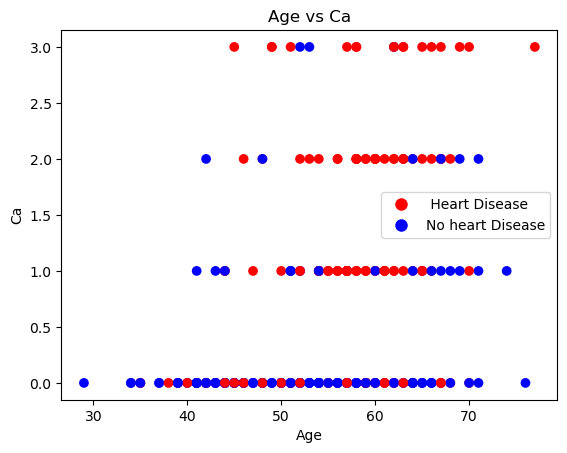

In [22]:
data = pd.read_csv('heart.csv')

x_column = 'Age'
y_column = 'Ca'

plt.scatter(data[x_column], data[y_column], c=data['AHD'].map({'Yes': 'r', 'No': 'b'}), label='Data')

custom_legend = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='r', markersize=10, label=' Heart Disease'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='b', markersize=10, label='No heart Disease')
]

plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'{x_column} vs {y_column}')
plt.legend(handles=custom_legend)
plt.show()